In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
MM = pd.read_csv('main_data.csv')

In [3]:
MM

,Unnamed: 0,country,ccode,year,protest,protesterviolence,protest_time,reasons_political,reasons_social,reasons_labor,...,responses_crowd_dispersal,responses_ignore,responses_other,responses_accomodation,responses_arrests,responses_killings,violent_response,success,violence_both,violent_protest_time
0,13647,Afghanistan,700,1990,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13648,Afghanistan,700,1991,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,13649,Afghanistan,700,1992,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13650,Afghanistan,700,1993,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13651,Afghanistan,700,1994,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17140,11116,Zimbabwe,552,2019,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
17141,11117,Zimbabwe,552,2019,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
17142,11118,Zimbabwe,552,2019,1,1,1,0,0,1,...,1,0,0,0,0,0,0,0,1,1
17143,11119,Zimbabwe,552,2019,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [4]:
violence = MM.sort_values(['country','year'])

In [5]:
violence = violence.sort_values(['protest_time'])

In [6]:
violence = violence.drop(['reasons_political', 'reasons_labor', 'reasons_price',
       'reasons_land', 'reasons_policebrutality', 'reasons_removal',
       'reasons_social', 'reasons_other', 'responses_crowd_dispersal',
       'responses_killings', 'responses_beatings', 'responses_shootings',
       'responses_arrests', 'responses_ignore', 'responses_accomodation',
       'responses_other', 'violent_response', 'success'], axis=1)

In [7]:
violence

,Unnamed: 0,country,ccode,year,protest,protesterviolence,protest_time,violence_both,violent_protest_time
0,13647,Afghanistan,700,1990,0,0,0,0,0
7124,12702,Iraq,645,1996,0,0,0,0,0
7125,12703,Iraq,645,1997,0,0,0,0,0
7126,12704,Iraq,645,1998,0,0,0,0,0
7127,12705,Iraq,645,1999,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2616,2576,Chile,155,2016,1,0,368,0,0
14357,12993,Syria,652,2011,1,1,627,1,627
5864,6402,Greece,350,2013,1,0,659,0,0
6760,15242,India,750,2014,1,1,732,1,732


In [8]:
# data = pd.read_csv('violence_and_time.csv')

In [9]:
violence = violence.sort_values(['protest_time']).drop(['Unnamed: 0','ccode', 
                                                    'country', 'year', 
                                                    'protest', 'protesterviolence', 'violent_protest_time'], axis=1)

In [10]:
violence0 = violence.copy()

In [11]:
violence0

,protest_time,violence_both
0,0,0
11282,0,0
11281,0,0
11280,0,0
11279,0,0
...,...,...
2616,368,0
14357,627,1
5864,659,0
6760,732,1


In [12]:
bins1 = [-1, 0, 10, 950]
index = ['End within 1 day', '1 days to 10 days', 'More than 10 days']
violence0.insert(0, "protest_time_interval", pd.cut(violence0['protest_time'], bins=bins1, labels = index))
violence0 = violence0.dropna(subset=['protest_time_interval'])

In [13]:
violence0['violence'] = np.where(violence0['violence_both']== 1, 'Violent', 'Nonviolent')
violence0['count'] = 1
violence0

,protest_time_interval,protest_time,violence_both,violence,count
0,End within 1 day,0,0,Nonviolent,1
11282,End within 1 day,0,0,Nonviolent,1
11281,End within 1 day,0,0,Nonviolent,1
11280,End within 1 day,0,0,Nonviolent,1
11279,End within 1 day,0,0,Nonviolent,1
...,...,...,...,...,...
2616,More than 10 days,368,0,Nonviolent,1
14357,More than 10 days,627,1,Violent,1
5864,More than 10 days,659,0,Nonviolent,1
6760,More than 10 days,732,1,Violent,1


In [14]:
# Nonviolent Case
v = violence0[violence0.violence == 'Nonviolent']

In [15]:
# Violent Case
nv = violence0[violence0.violence == 'Violent']

In [16]:
overall = violence0.groupby(['protest_time_interval']).size().reset_index(name="total_count")

In [17]:
overall

,protest_time_interval,total_count
0,End within 1 day,1906
1,1 days to 10 days,14783
2,More than 10 days,456


In [18]:
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#171717'
plt.rcParams['axes.labelcolor']= '#171717'
plt.rcParams['xtick.color'] = '#171717'
plt.rcParams['ytick.color'] = '#171717'
plt.rcParams['font.size']='22'

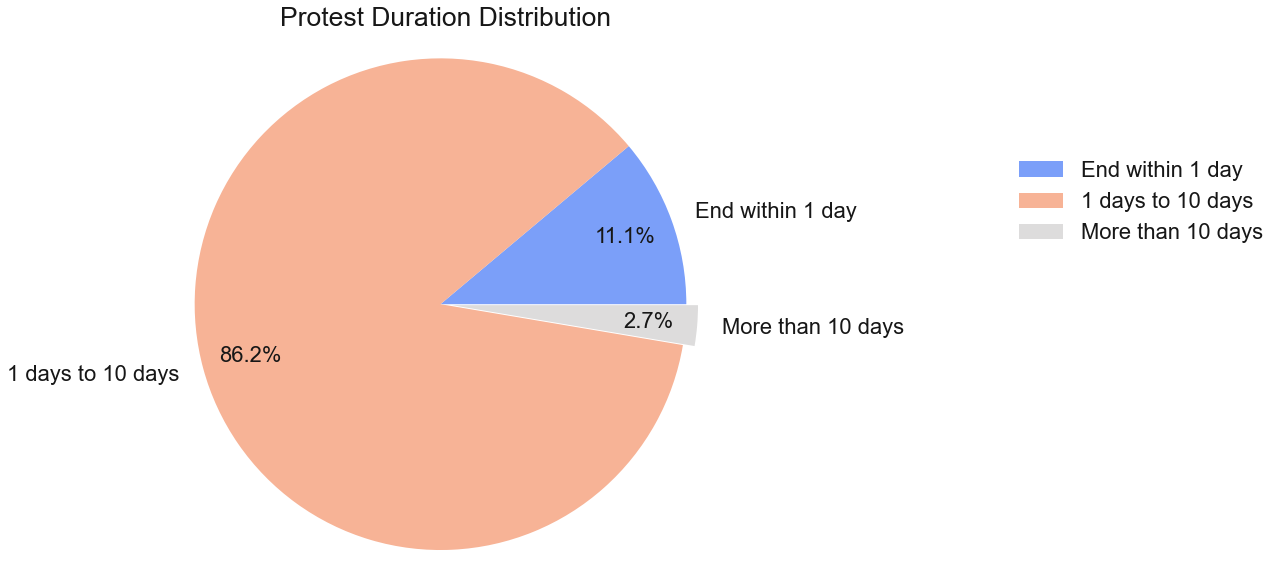

In [19]:
# from matplotlib import cm
fig, ax = plt.subplots(figsize=(15,10))
labels = overall['protest_time_interval']
percentages = overall['total_count']
color = plt.cm.coolwarm([0.2, 0.68, 0.5])
ax.pie(percentages, explode=[0, 0, 0.5],labels = labels,
        autopct='%.1f%%', 
       shadow=False, startangle = 0, colors=color,
       pctdistance=0.8,labeldistance=1.1, radius = 10.5)
ax.axis('equal')
ax.set_title("Protest Duration Distribution")


ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

fig.savefig("Protest Duration Distribution.png", bbox_inches='tight')

In [20]:
v = v.groupby(['protest_time_interval']).size().reset_index(name="total_count")

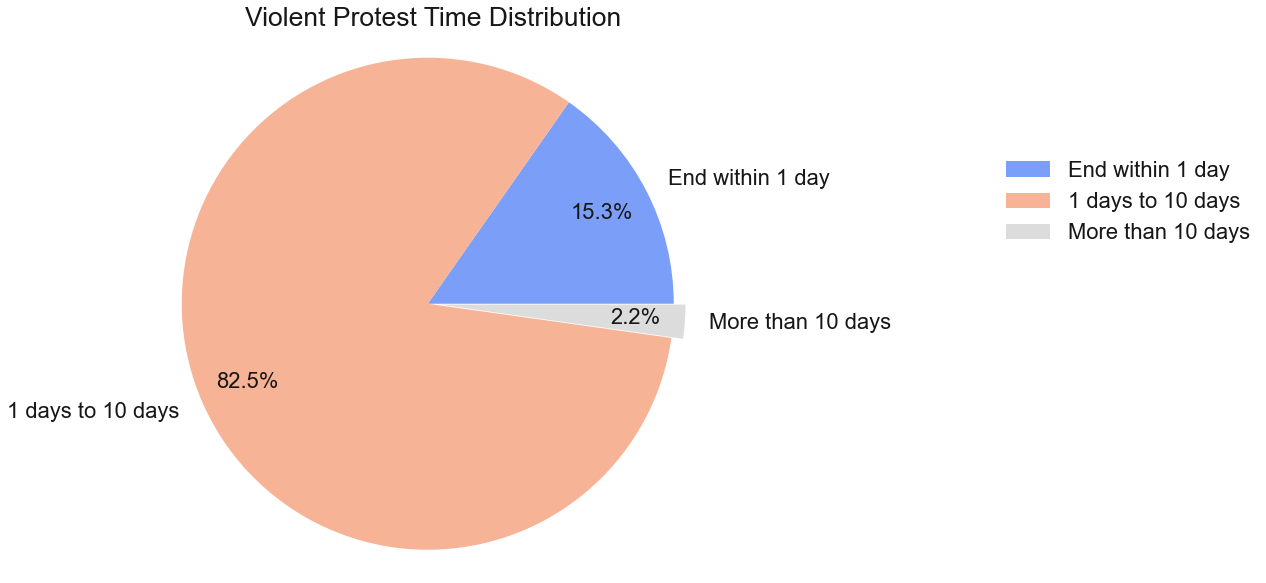

In [21]:
fig, ax = plt.subplots(figsize=(15,10))
labels = v['protest_time_interval']
percentages = v['total_count']
color = plt.cm.coolwarm([0.2, 0.68, 0.5])
ax.pie(percentages, explode=[0, 0, 0.5], labels = labels,
        autopct='%.1f%%', 
       shadow=False, startangle = 0, colors = color,
       pctdistance=0.8,labeldistance=1.1, radius = 10.5)
ax.axis('equal')
ax.set_title("Violent Protest Time Distribution")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

fig.savefig("Violent Protest Duration Distribution.png", bbox_inches='tight')

In [22]:
nv = nv.groupby(['protest_time_interval']).size().reset_index(name="total_count")

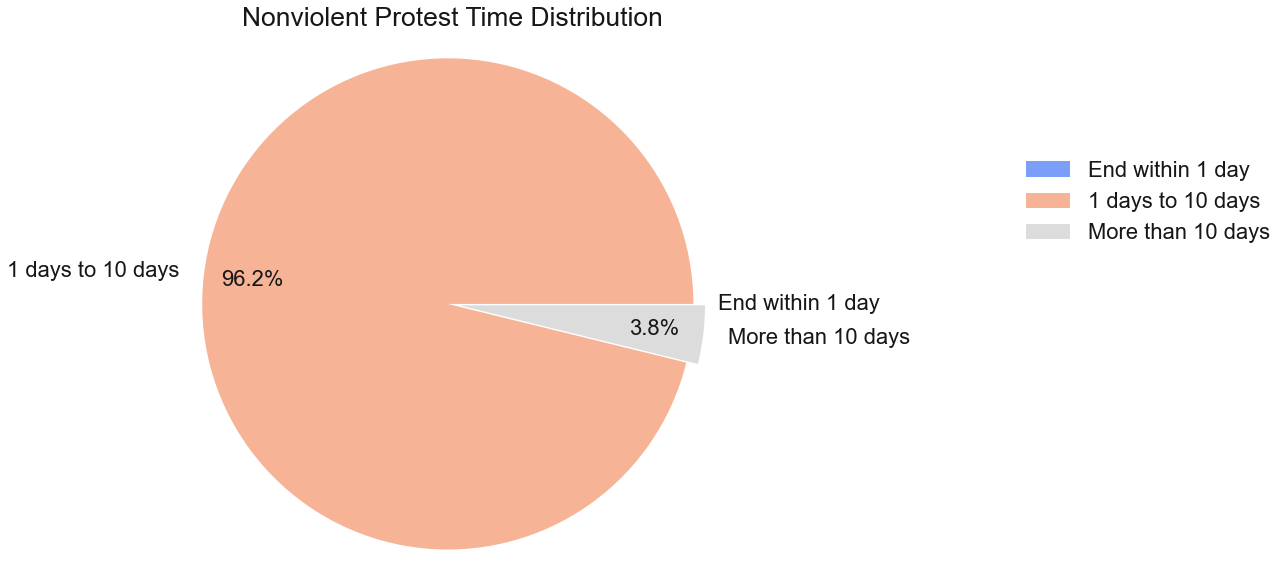

In [23]:
def autopct_condition(pct):
    return ('%.1f%%' % pct) if pct > 0 else ''

fig, ax = plt.subplots(figsize=(15,10))
labels = nv['protest_time_interval']
percentages = nv['total_count']
color = plt.cm.coolwarm([0.2, 0.68, 0.5])
ax.pie(percentages, explode=[0, 0, 0.5], labels = labels,
        autopct=autopct_condition, 
       shadow=False, startangle = 0, colors = color,
       pctdistance=0.8,labeldistance=1.1, radius = 10.5)
ax.axis('equal')
ax.set_title("Nonviolent Protest Time Distribution")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

fig.savefig("Nonviolent Protest Duration Distribution.png", bbox_inches='tight')

In [24]:
violence0

,protest_time_interval,protest_time,violence_both,violence,count
0,End within 1 day,0,0,Nonviolent,1
11282,End within 1 day,0,0,Nonviolent,1
11281,End within 1 day,0,0,Nonviolent,1
11280,End within 1 day,0,0,Nonviolent,1
11279,End within 1 day,0,0,Nonviolent,1
...,...,...,...,...,...
2616,More than 10 days,368,0,Nonviolent,1
14357,More than 10 days,627,1,Violent,1
5864,More than 10 days,659,0,Nonviolent,1
6760,More than 10 days,732,1,Violent,1


# 10 days

In [25]:
ten_days = violence.copy()

In [26]:
bins_10 = [-1, 10, 950]
index = ['End within 10 days', 'More than 10 days']
ten_days.insert(0, "protest_time_interval", pd.cut(ten_days['protest_time'], bins=bins_10, labels = index))
ten_days = ten_days.dropna(subset=['protest_time_interval'])

In [27]:
ten_days

,protest_time_interval,protest_time,violence_both
0,End within 10 days,0,0
11282,End within 10 days,0,0
11281,End within 10 days,0,0
11280,End within 10 days,0,0
11279,End within 10 days,0,0
...,...,...,...
2616,More than 10 days,368,0
14357,More than 10 days,627,1
5864,More than 10 days,659,0
6760,More than 10 days,732,1


In [28]:
ten_days['violence'] = np.where(ten_days['violence_both']== 1, 'Violent', 'Nonviolent')
ten_days['count'] = 1
ten_days

,protest_time_interval,protest_time,violence_both,violence,count
0,End within 10 days,0,0,Nonviolent,1
11282,End within 10 days,0,0,Nonviolent,1
11281,End within 10 days,0,0,Nonviolent,1
11280,End within 10 days,0,0,Nonviolent,1
11279,End within 10 days,0,0,Nonviolent,1
...,...,...,...,...,...
2616,More than 10 days,368,0,Nonviolent,1
14357,More than 10 days,627,1,Violent,1
5864,More than 10 days,659,0,Nonviolent,1
6760,More than 10 days,732,1,Violent,1


In [29]:
ten_days = ten_days.groupby(['protest_time_interval', 'violence']).size().reset_index(name="total_count")

In [30]:
ten_days

,protest_time_interval,violence,total_count
0,End within 10 days,Nonviolent,12204
1,End within 10 days,Violent,4485
2,More than 10 days,Nonviolent,277
3,More than 10 days,Violent,179


# Less than 10 days

In [31]:
ten_days_less = ten_days[ten_days.protest_time_interval == 'End within 10 days']
ten_days_less

,protest_time_interval,violence,total_count
0,End within 10 days,Nonviolent,12204
1,End within 10 days,Violent,4485


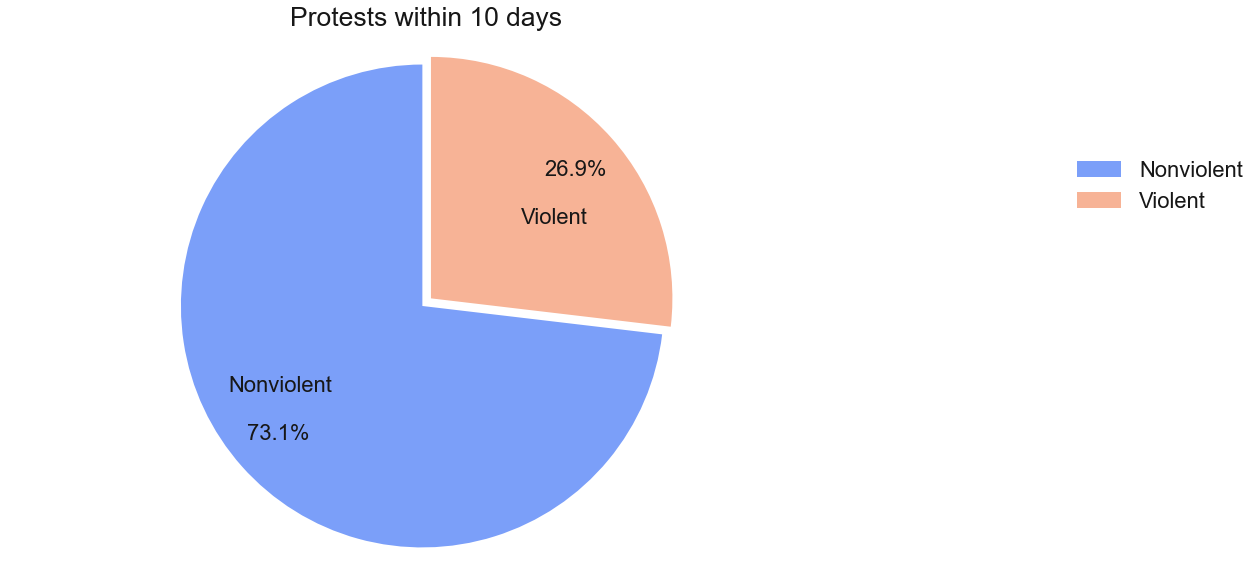

In [32]:
fig, ax = plt.subplots(figsize=(15,10))
labels = ten_days_less['violence']
percentages = ten_days_less['total_count']
color = plt.cm.coolwarm([0.2, 0.68])
ax.pie(percentages, explode=[0.5, 0],labels = labels,
        autopct='%.1f%%', 
       shadow=False, startangle = 90, colors=color,
       pctdistance=0.8,labeldistance=0.5, radius = 10.5)
ax.axis('equal')
ax.set_title("Protests within 10 days")


ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

fig.savefig("Protests within 10 days.png", bbox_inches='tight')

# More than 10 days

In [33]:
ten_days_more = ten_days[ten_days.protest_time_interval == 'More than 10 days']
ten_days_more

,protest_time_interval,violence,total_count
2,More than 10 days,Nonviolent,277
3,More than 10 days,Violent,179


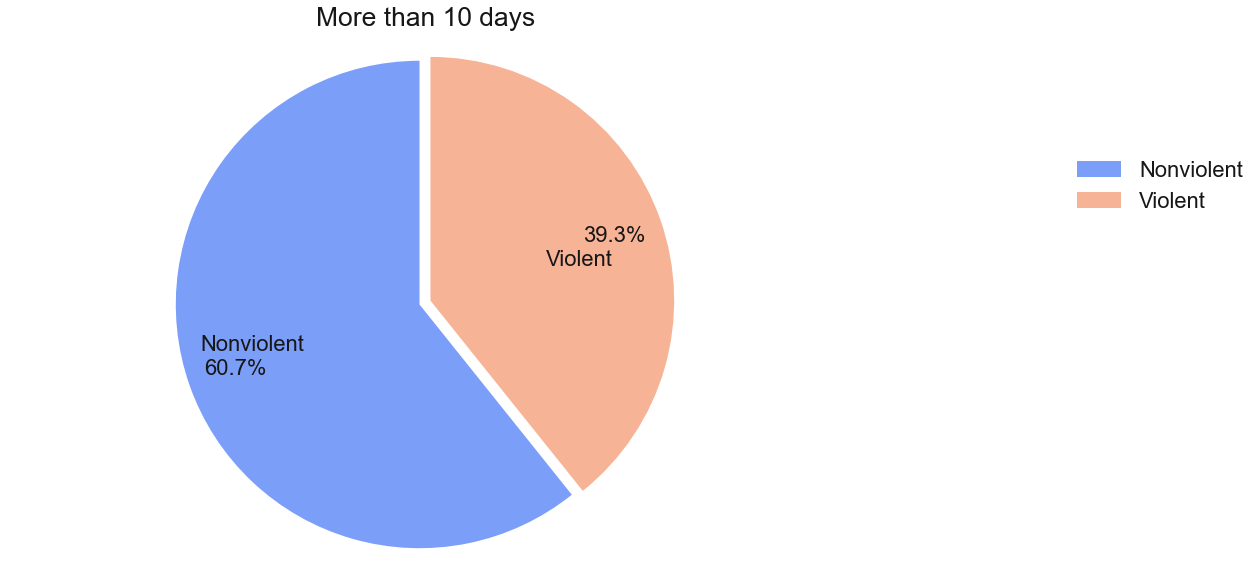

In [34]:
fig, ax = plt.subplots(figsize=(15,10))
labels = ten_days_more['violence']
percentages = ten_days_more['total_count']
color = plt.cm.coolwarm([0.2, 0.68])
ax.pie(percentages, explode=[0.5, 0],labels = labels,
        autopct='%.1f%%', 
       shadow=False, startangle = 90, colors=color,
       pctdistance=0.8,labeldistance=0.5, radius = 10.5)
ax.axis('equal')
ax.set_title("More than 10 days")


ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

fig.savefig("More than 10 days.png", bbox_inches='tight')

# Protest end within one day

In [35]:
one_day = violence0[violence0.protest_time_interval == 'End within 1 day']
one_day

,protest_time_interval,protest_time,violence_both,violence,count
0,End within 1 day,0,0,Nonviolent,1
11282,End within 1 day,0,0,Nonviolent,1
11281,End within 1 day,0,0,Nonviolent,1
11280,End within 1 day,0,0,Nonviolent,1
11279,End within 1 day,0,0,Nonviolent,1
...,...,...,...,...,...
4302,End within 1 day,0,0,Nonviolent,1
3454,End within 1 day,0,0,Nonviolent,1
3455,End within 1 day,0,0,Nonviolent,1
4288,End within 1 day,0,0,Nonviolent,1


In [36]:
one_day = one_day.groupby(['violence']).size().reset_index(name = 'total_count')

In [37]:
row = {"violence" : "Violent", "total_count" : 0}
one_day = one_day.append(row, ignore_index = True)

In [38]:
one_day

,violence,total_count
0,Nonviolent,1906
1,Violent,0


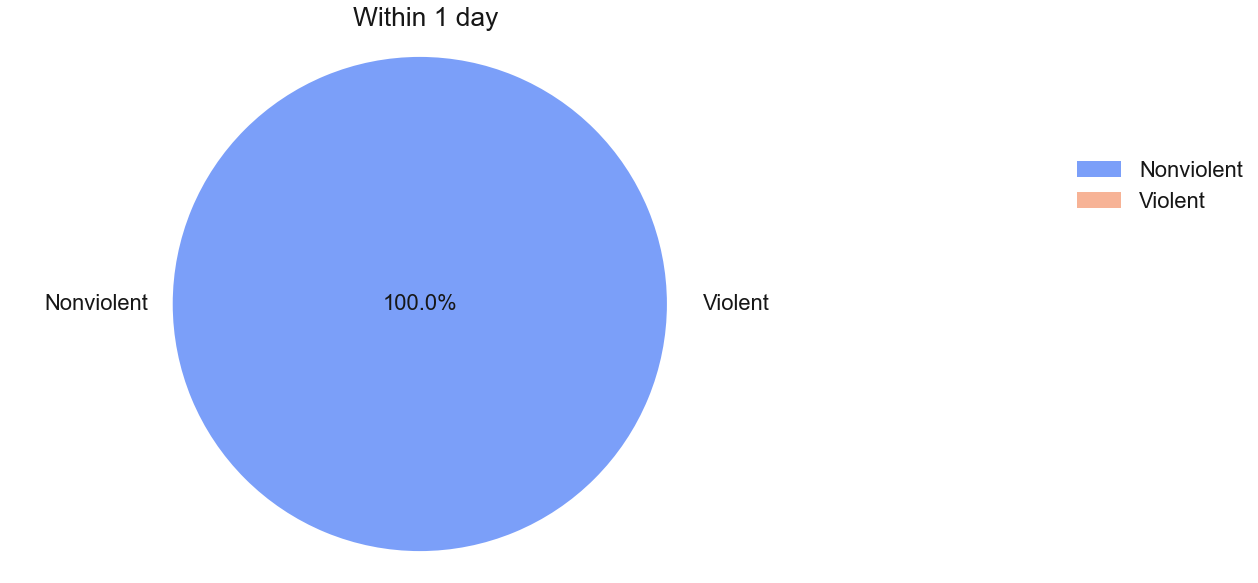

In [39]:
def my_autopct(pct):
    return ('%.1f%%' %pct) if pct > 0 else ""
fig, ax = plt.subplots(figsize=(15,10))
labels = one_day['violence']
percentages = one_day['total_count']
color = plt.cm.coolwarm([0.2, 0.68])
ax.pie(percentages, explode=[0.5, 0],labels = labels,
        autopct=my_autopct, 
       shadow=False, startangle = 0, colors=color,
       pctdistance=0,labeldistance=1.1, radius = 10.5)
ax.axis('equal')
ax.set_title("Within 1 day")


ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

fig.savefig("Within 1 day.png", bbox_inches='tight')

# 1 day to 10 days

In [40]:
one_to_ten = violence0.copy()

In [41]:
one_to_ten = one_to_ten.groupby(['protest_time_interval', 'violence']).size().reset_index(name = 'total_count')

In [42]:
one_to_ten = one_to_ten[one_to_ten.protest_time_interval == '1 days to 10 days']

In [43]:
one_to_ten

,protest_time_interval,violence,total_count
2,1 days to 10 days,Nonviolent,10298
3,1 days to 10 days,Violent,4485


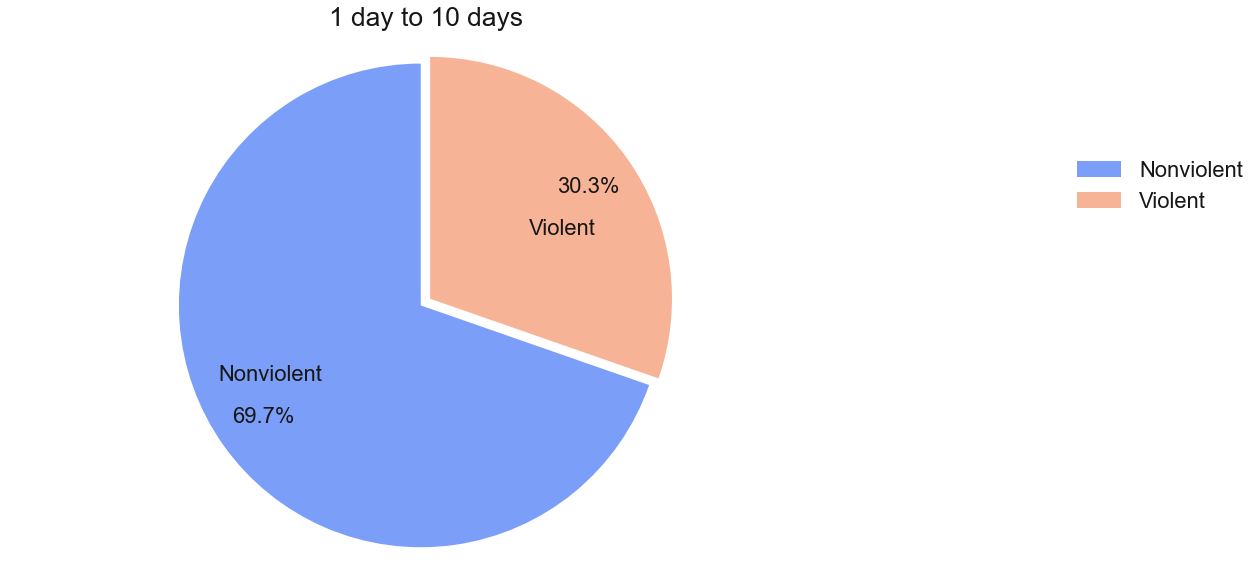

In [44]:
fig, ax = plt.subplots(figsize=(15,10))
labels = one_to_ten['violence']
percentages = one_to_ten['total_count']
color = plt.cm.coolwarm([0.2, 0.68])
ax.pie(percentages, explode=[0.5, 0],labels = labels,
        autopct='%.1f%%', 
       shadow=False, startangle = 90, colors=color,
       pctdistance=0.8,labeldistance=0.5, radius = 10.5)
ax.axis('equal')
ax.set_title("1 day to 10 days")


ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

fig.savefig("1 day to 10 days.png", bbox_inches='tight')